In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

### Ссылка на экспоненциальное и нормальное распределение:
[Wikipedia - экспоненциальное распределение](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

[Wikipedia - нормальное распределение](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

### Формулы для расчета теоретических мат ожидания и дисперсии экспоненциального распределения:
$ EX = \lambda^{-1} $

$ DX = \lambda^{-2} $

In [348]:
#lambd - лямбда из формулы распределения
lambd = 0.1

#мат ожидание и дисперсия
EX = lambd ** (-1)
DX = lambd ** (-2)

# сгенерируем выборку объема 1000 из экспоненциального распределения
x = np.linspace(0, 15, 1000)
expon_rv = sts.expon(lambd)
elementary_sample = expon_rv.rvs(1000)

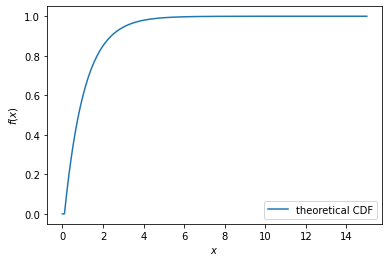

In [349]:
# эмприческая функция распределения для полученной выборки:
cdf = expon_rv.cdf(x)

plt.plot(x, cdf, label = 'theoretical CDF')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc = 'lower right')

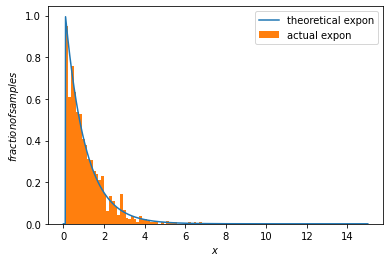

In [350]:
# гистограмма выборки с графиком плотности:
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label = 'theoretical expon')

plt.hist(elementary_sample, bins = 50, density = True, label = 'actual expon')
plt.xlabel('$x$')
plt.ylabel('$fraction of samples$')

plt.legend(loc = 'upper right')

### Как мы видим, теоретическая плотность распределения совпадает с гистрограммой нашей выборки

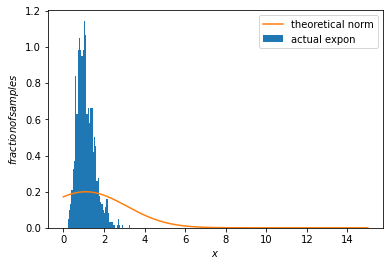

In [351]:
#можем сделать n = 5, 10, 50 и сгенерировать 1000 выборок такого объема
n = 5

#сделаем функцию генерации выборок объема "n":
def generate_samples(n):
    samples = np.array([])
    for i in range(1000):
        sample = expon_rv.rvs(n)
        mean = np.sum(sample) / n
        samples = np.append(samples, mean)
    return samples
    
true_samples = generate_samples(n)

#посчитаем значения параметров нормальных распределений и построим график
MU = np.sum(true_samples) / 1000
SIGMA = np.sqrt(DX) / n

norm_rv = sts.norm(MU, SIGMA)
norm_pdf = norm_rv.pdf(x)

plt.hist(true_samples, bins = 50, density = True, label = 'actual expon')
plt.plot(x, norm_pdf, label = 'theoretical norm')

plt.xlabel('$x$')
plt.ylabel('$fraction of samples$')
plt.legend(loc = 'upper right')

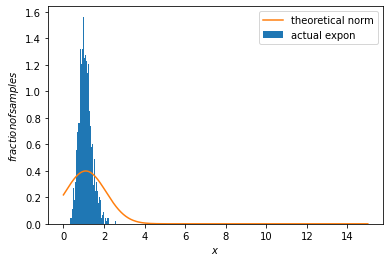

In [352]:
#рассмотрим n = 10:
n = 10
true_samples = generate_samples(n)

#посчитаем значения параметров нормальных распределений и построим график
MU = np.sum(true_samples) / 1000
SIGMA = np.sqrt(DX) / n

norm_rv = sts.norm(MU, SIGMA)
norm_pdf = norm_rv.pdf(x)

plt.hist(true_samples, bins = 50, density = True, label = 'actual expon')
plt.plot(x, norm_pdf, label = 'theoretical norm')

plt.xlabel('$x$')
plt.ylabel('$fraction of samples$')
plt.legend(loc = 'upper right')

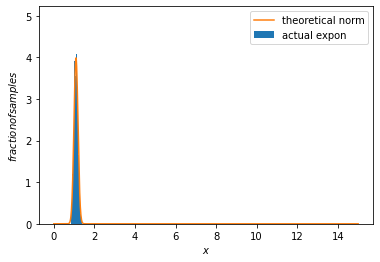

In [353]:
#ну и напоследок рассмотрим n = 100:
n = 100
true_samples = generate_samples(n)

#посчитаем значения параметров нормальных распределений и построим график
MU = np.sum(true_samples) / 1000
SIGMA = np.sqrt(DX) / n

norm_rv = sts.norm(MU, SIGMA)
norm_pdf = norm_rv.pdf(x)

plt.hist(true_samples, bins = 50, density = True, label = 'actual expon')
plt.plot(x, norm_pdf, label = 'theoretical norm')

plt.xlabel('$x$')
plt.ylabel('$fraction of samples$')
plt.legend(loc = 'upper right')

### Так как данное распределение ассиметричное, то мы видим некоторое смещение, но с ростом "n", данное смещение уменьшается (например, при n = 100 получается все как надо)

## Вывод: с ростом "n" точность нормальной аппроксимации распределения выборочных средних растет, центральная предельная теорема работает :)